# <center><font color='DarkSalmon'>Assignment Seven</font></center>
### <center><font color='Salmon'>Computer Science 4304</font></center>
<center><font color ='LightSalmon'>Courtney St. George <br> 200917250 <br></font></center> 

This notebook uses the olympic_athletes.csv dataset and contains data related to athletes that competed in the Olympics from 1896 to 2016. Each row contains data for each athlete such as name, gender, age, height, weight, team, location, which Olympics they competed in, the sport, event, and the medal earned.

Computations are completed using pandas, matplotlib, seaborn, and ipywidgets with the dataset provided to visualize the following:

- Height distributions for gold-medal winning athletes at the 2016 Olympics for a set of sports including Athletics, Gymnastics, Swimming, Shooting, Cycling, Fencing, Rowing, and Wrestling. Height distributions are shown for each sport using a violin plot with individual heights overlaying the violin plot using a swarmplot.

- Weight and height distributions for gold-medal winning athletes from the 2000 - 2016 Olympics inclusively, for the same set of sports used in the previous plot. Data is shown using an interative visualization that allows you to filter which sports are plotted, apply kernel density estimation to the distribution of data, and to enable plotting an overlay of points to show individual weight and height. To visualize the distribution for each sport a histplot is used as default. If kde is enabled the visualization uses a kdeplot, if display data is enabled the visualization uses a scatterplot as the overlay on the histplot or kdeplot. The points in the scatterplot are colored based on gender.

Import libraries to be used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Import the dataset

In [2]:
df_master = pd.read_csv('olympic_athletes.csv')

#### Question One: Recreate the plot to show the height distributions for the gold-medal winning athletes at the 2016 Olympics for several categories of sport. The points are the heights of individual athletes for the given sport.

Create list of sports to use for each visualization

In [3]:
options = ['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling', 'Fencing', 'Rowing', 'Wrestling']
options2 = ['Combined', 'Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling', 'Fencing', 'Rowing', 'Wrestling']

Filter data to only include specificed sports, gold-medal winners, and restrict to the year 2016. Duplicates of athletes in the same sport category are dropped, and the height data is checked for null values.

In [4]:
df = df_master.loc[(df_master["Sport"].isin(options))&(df_master["Medal"] == "Gold") & (df_master["Year"] == 2016)]
df = df.drop_duplicates(subset=['NOC', 'ID', 'Name', 'Sport'], keep='last')
df = df[df['Height'].notna()]

Create violin plot with sport on the x axis, height on the y axis. Add a swarmplot overlaying the violin plot to show individual heights of athletes for that sport.

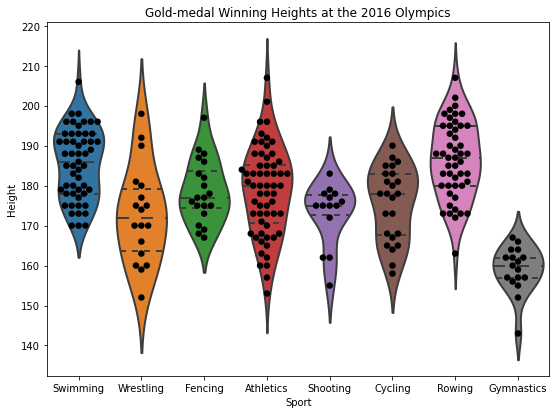

In [5]:
fig, ax = plt.subplots(figsize=(9, 6.5))
ax = sns.violinplot(x= 'Sport', y= 'Height', data = df, scale='width', inner="quartile", linewidth=2, ax=ax)
ax = sns.swarmplot(x='Sport', y='Height', size=6.5,data=df, color='black', ax=ax)
ax.set_title('Gold-medal Winning Heights at the 2016 Olympics')
plt.show()

#### Question 2: Recreate the interactive visualization with the height and weight distributions for gold-medal winning athletes in the 2000 to 2016 Olympics (inclusive). The default view is a heat map of the distribution, in which the data is binned in value increments of 5 for both variables. The kde checkbox will change the visualization to a contour plot of the distribution estimated using kernel density estimation. The display_data checkbox will overlay the heat map or contour plot with the raw data points for each individual athlete. These data are colour coded according to the gender of the athlete.

Filter data to only include gold medal winners between the years 2000 and 2016 inclusively, from the specified list of sports. Duplicate athletes from the same sport are dropped and the dataframe is checked for null values.

In [6]:
df = df_master.loc[(df_master["Medal"] == "Gold") & (df_master['Year'] >= 2000) 
     & (df_master['Year']<= 2016) & (df_master['Sport'].isin(options))]
df = df.drop_duplicates(subset=['NOC', 'ID', 'Name', 'Sport'], keep='last')
df = df[(df['Height'].notna()) & (df['Weight'].notna())]

- Create interactive elements, sports is a dropdown box of specified sports including "Combined" option. kde is a checkbox to enable plot with kernel density estimation, and dis is a checkbox to enable overlay of individual points.
- dft contains the data for all sport categories by default, if any value that isn't "Combined" is selected, dft is filtered to include data only for the sport selected in the dropdown box.
- Default view is "Combined" with histplot displaying the weight and height distributions, binwidth and binrange is specified to make sure bins are shown correctly.
- If kde checkbox is selected a kdeplot is used to plot the weight and height distribution with kernel density estimation, fill is set to true to fill in the contours. 
- If dis checkbox is selected a scatterplot is added to show individual weight and height for each athelete. Points are color coded by gender, hue order is specified to keep the order constant for all plots.
- Limits are set for the axis to show correctly.

In [7]:
@interact(sport=widgets.Dropdown(options= options2, value=options2[0], description='Sport'),
         kde = widgets.Checkbox(description="KDE"),
         dis = widgets.Checkbox(description="Display Data"))
def f(sport, kde, dis):
    dft = df
    fig, ax = plt.subplots(figsize=(8, 6))
    if sport != 'Combined':
        dft= df[df['Sport'] == sport]
    if (kde):
        ax = sns.kdeplot(x='Weight', y='Height', data=dft, cmap='Blues', fill=True, ax=ax)
    else:
        ax = sns.histplot(dft, x='Weight', y='Height', cmap='Blues', binwidth=5.0, binrange=[(20, 140),(130,220)], ax=ax)
    if (dis):
        ax = sns.scatterplot(x='Weight', y='Height',data=dft, hue='Sex', hue_order=(['M','F']), color='black', ax=ax)
    #cleanup
    ax.set_xlim([20, 140])
    ax.set_ylim([130, 220])
    plt.suptitle('Gold Medal Winning Heights and Weights')
    ax.set_title('2000 - 2016 Olympics')

interactive(children=(Dropdown(description='Sport', options=('Combined', 'Athletics', 'Gymnastics', 'Swimming'…